# Capstone Project - 0 HR HTS Imaging Data

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import subprocess
import cv2

In [3]:
if not os.path.exists('data/zero_hour_images'):
    os.makedirs('data/zero_hour_images')
    
if not os.path.exists('data/zero_hour_csv'):
    os.makedirs('data/zero_hour_csv')
    
if not os.path.exists('data/cropped'):
    os.makedirs('data/cropped')

In [ ]:
runs = os.listdir('data/original')
runs.sort()

for run in runs:
    
    files = pd.Series(os.listdir('data/original/{}'.format(run)))
    files = files[(files.str.contains('0Hr_XY')) & (~files.str.contains('Trim'))]
    
    files = files[files.str[-3:]=='tif']
    files = files.drop_duplicates().sort_values()
    
    if files.shape[0] > 0:
        
        print('Copying 0hr Images of {}'.format(run), end='\r', flush=True)
        
        for file in files:
            subprocess.run(['cp', 'data/original/{}/{}'.format(run, file), 'data/zero_hour_images/{}'.format(file)])

In [ ]:
runs = os.listdir('data/original')
runs.sort()

for run in runs:
    
    files = pd.Series(os.listdir('data/original/{}'.format(run)))
    csv_files = files[files.str.contains('csv')]
            
    if csv_files.shape[0] > 0:
        
        print('Copying 0hr csv files of {}'.format(run), end='\r', flush=True)
        
        for file in csv_files:
            if file[:3] == 'RUN':
                subprocess.run(['cp', 'data/original/{}/{}'.format(run, file), 'data/zero_hour_csv/{}'.format(file)])

Missing 0hr images among downloaded data

In [ ]:
runs = os.listdir('data/original')
runs.sort()
for run in runs:
    files = pd.Series(os.listdir('data/original/{}'.format(run)))
    files = files[files.str.contains('0Hr')]
    if files.shape[0] == 0:
        print(run, files.shape)

Missing runs

In [ ]:
downloaded_runs = pd.Series(os.listdir('data/zero_hour_images'))
downloaded_runs = downloaded_runs.str.split('_').str[0].str.replace('Run', '', regex=False).sort_values().unique()
downloaded_runs = [x for x in downloaded_runs if 'ipynb' not in x]
print('Missnig runs are')
_ = [print(i) for i in range(81) if str(i) not in downloaded_runs]

In [ ]:
print(f'{len(downloaded_runs)} number of Runs downloaded')

In [11]:
images = []

for i, file in enumerate(os.listdir('data/zero_hour_images')):
    
    if 'tif' not in file and '0Hr' not in file:
        continue

    try:
        img = cv2.imread('data/zero_hour_images/{}'.format(file))
    except:
        continue

    images.append((file, img))
    
    print('{}'.format(i+1), end='\r', flush=True)

In [24]:
len(images)

5562

In [23]:
images = [x for x in images if x[1] is not None]

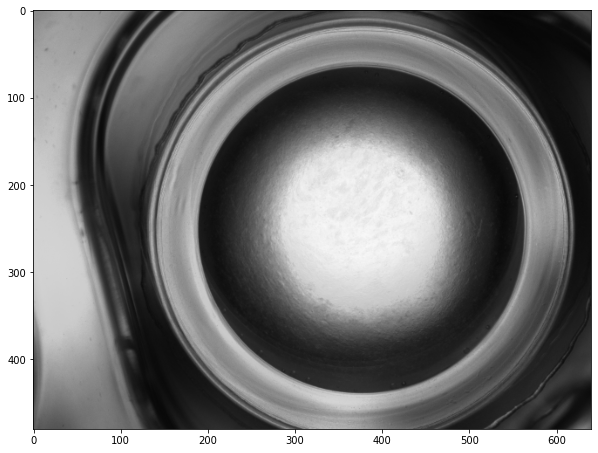

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ind = 0
for i in images:
    
    ax.imshow(i[1], alpha=.7)
    ind += 1
    print(ind, end='\r', flush=True)

In [26]:
images = [(x[0], x[1][:, 140:580]) for x in images]

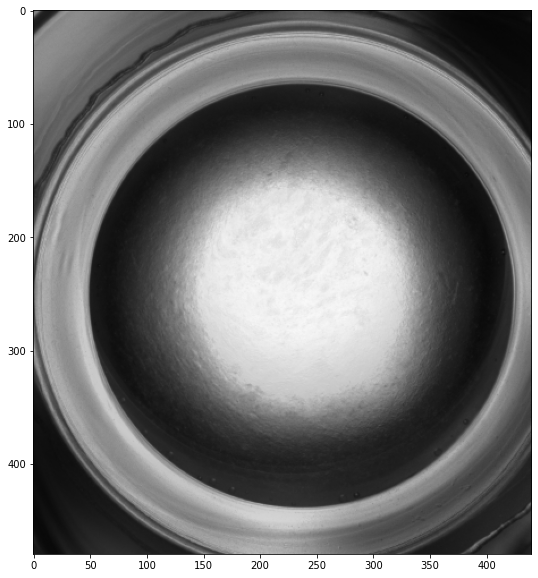

In [27]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ind = 0

for i in images:
    
    ax.imshow(i[1], alpha=.7)
    ind += 1
    print(ind, end='\r', flush=True)